# 3 Things you need to know before listing or booking on Airbnb in Seattle (Part 1&2)
## (Please note: This notebook only covers Part 1 & 2 for this project. Please move forward to `"Seattle Airbnb Data Analysis-Part 3"` notebook for more content)

The dataset (available on [Kaggle](https://www.kaggle.com/airbnb/seattle)) we will be using includes the listing activities of homestays in Seattle, as part of the Airbnb Inside initiative. The dataset has three data files:

* `Calendar`: Listing id and the price and availability for that day
* `Listings`: Full descriptions and average review score
* `Reviews`: Unique id for each reviewer and detailed comments

While exploring the data, we will try to anwer the following three questions:

1. What are the busiest (and most profitable) times of the year for Seattle hosts?

2. What are the main drivers for a high listing prices?

3. What do visitors care most about their stays?

## Data Exploration

In [2]:
# Import libiaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#np.version.version # 1.18.4
#!pip install numpy==1.17.4

#sns.__version__ # 0.8.1 -> 0.9.1
#!pip install seaborn==0.9.1

### Load  all datasets

In [3]:
# Load the calendar data
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Read in the listings data
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
# Read in the reviews data
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Explore the Calendar data

In [10]:
#find number of rows and columns in the dataset
rows = df_calendar.shape[0]
cols = df_calendar.shape[1]
print("There are {} rows and {} columns in the calendar data.".format(rows, cols))

There are 1393570 rows and 4 columns in the calendar data.


In [11]:
# Assess null values
print(df_calendar.isnull().mean() * 100)

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64


In [12]:
# Check data types
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### Explore the Listings data

In [13]:
#find number of rows and columns in the dataset
rows = df_listings.shape[0]
cols = df_listings.shape[1]
print("There are {} rows and {} columns in the listings data.".format(rows, cols))

There are 3818 rows and 92 columns in the listings data.


In [14]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Explore the reviews data

In [15]:
#find number of rows and columns in the dataset
rows = df_reviews.shape[0]
cols = df_reviews.shape[1]
print("There are {} rows and {} columns in the reviews data".format(rows, cols))

There are 84849 rows and 6 columns in the reviews data


In [16]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


We have a lot of data in the calendar file. Although there're many missing values in the price column, we should still be able to get a delicated time trend of listing prices, which is good! There're many columns in the listings file, and several of them have missing values. To make analysis and predictions, we need to do some data clearning first.

## Part 1. What are the busiest and most profitable times of the year for Seattle hosts?

### 1.1 Calendar data cleaning

In [17]:
# Clean up Price variable
df_calendar_clean = df_calendar.copy()

# Remove special characters in the price column and convert the data into float numbers
df_calendar_clean['price'] = df_calendar_clean['price'].astype(str)\
                            .str.replace(',','').str.replace('$','').astype(float) 

In [18]:
# Cemoving the rows with missing valuse
df_calendar_clean = df_calendar_clean.dropna(subset = ['price'], axis = 0)
df_calendar_clean.shape

(934542, 4)

In [19]:
df_calendar_clean.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


In [20]:
# Clean up date variable
df_calendar_clean['date'] = pd.to_datetime(df_calendar['date']) 

# Clean up listing_id variable
df_calendar_clean['listing_id'] = df_calendar_clean['listing_id'].astype(str)

# Check updated datatypes for calendar dataset
df_calendar_clean.dtypes

listing_id            object
date          datetime64[ns]
available             object
price                float64
dtype: object

In [21]:
# Identify the first listing in the calendar
df_calendar_clean.sort_values('date').head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0


In [22]:
# Identify the last listing in the calendar
df_calendar_clean.sort_values('date').tail(1)

,listing_id,date,available,price
835119,9823290,2017-01-02,t,80.0


All the listings were posted with about an entire year, from January 4th, 2016 to Janurary 2nd, 2017.

### 1.2 Calendar data visualization

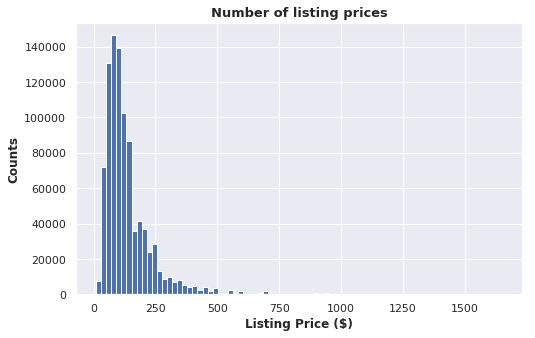

In [25]:
# Plot listing count against listing price
plt.figure(figsize = (8, 5))

plt.hist(df_calendar_clean['price'], bins = 80)
plt.xlabel('Listing Price ($)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Counts', fontsize = 12, fontweight = 'bold')
plt.title('Number of listing prices', fontsize = 13, fontweight = 'bold')
plt.savefig('Number of listing prices')

plt.show()

This data is right skewed and most listing prices are less than $200/night.

#### Listing price by month

In [26]:
# Create a dataframe for average listing price
df_average_price = df_calendar_clean.groupby('date')['price'].mean().reset_index()

# Create a new column for month
df_average_price['month'] = df_average_price['date'].dt.month_name()
df_average_price.head()

,date,price,month
0,2016-01-04,122.085879,January
1,2016-01-05,120.681307,January
2,2016-01-06,120.928258,January
3,2016-01-07,120.958896,January
4,2016-01-08,127.640853,January


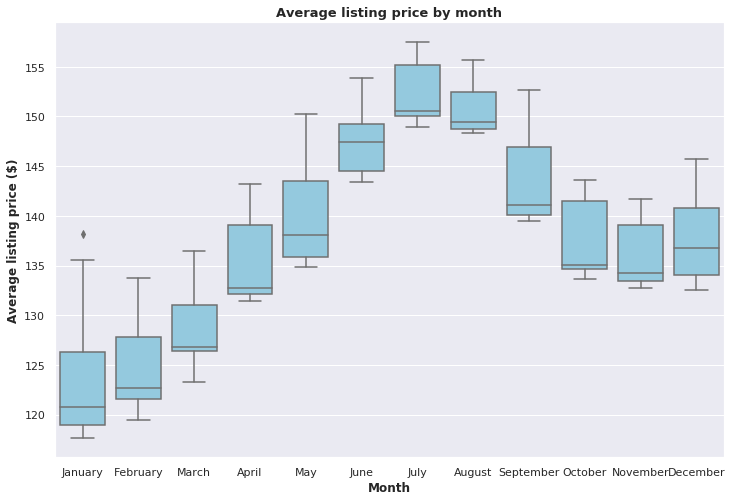

In [27]:
# Display average listing price by month
plt.figure(figsize = (12,8))
sns.boxplot(df_average_price['month'], df_average_price['price'], color = 'skyblue') 

plt.ylabel('Average listing price ($)', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold')
plt.title('Average listing price by month', fontsize = 13, fontweight = 'bold')

plt.savefig('Average listing price by month')

plt.show()

#### Listings by month

In [28]:
df_calendar_clean['available'].value_counts() # all listings are available

t    934542
Name: available, dtype: int64

In [29]:
# Create a new column for month
df_calendar_clean['month'] = df_calendar_clean['date'].dt.month_name()

# Group listings by month
df_listings_by_month = df_calendar_clean.groupby('month').count()

# Order data by month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

df_listings_by_month = df_listings_by_month.reindex(new_order, axis = 0)
df_listings_by_month['month'] = df_listings_by_month.index
df_listings_by_month = df_listings_by_month.reset_index(drop = True)

df_listings_by_month

,listing_id,date,available,price,month
0,64937,64937,64937,64937,January
1,73321,73321,73321,73321,February
2,83938,83938,83938,83938,March
3,76037,76037,76037,76037,April
4,79971,79971,79971,79971,May
5,77244,77244,77244,77244,June
6,74222,74222,74222,74222,July
7,76347,76347,76347,76347,August
8,77246,77246,77246,77246,September
9,82438,82438,82438,82438,October


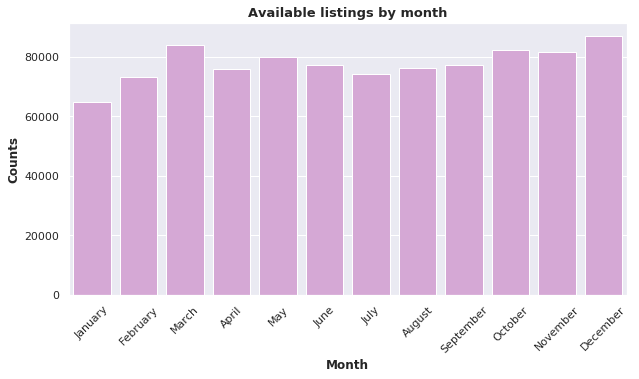

In [30]:
# Display listing count by month
plt.figure(figsize = (10, 5))

sns.barplot(x = 'month', y = 'available', 
            data = df_listings_by_month, color = 'plum')

plt.xticks(rotation = 45)
plt.ylabel('Counts', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold')
plt.title('Available listings by month', fontsize = 13, fontweight = 'bold')

plt.savefig('Listing count by month')
plt.show()

## Part 2. What are the main drivers for a high listing prices?

### 2.1 Listings data cleaning and feature selection

#### 2.1.1 Remove missing values, redundant data and those not very revelant to our price analysis.

In [31]:
# Evaluate the missing values in each column 
# and sort by number of missing values (high to low)

df_listings_missing = df_listings.isnull().mean() * 100
df_listings_missing.sort_values(ascending = False)

license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
reviews_per_month                    16.422211
first_review                         16.422211
last_review                          16.422211
space        

In [32]:
# Identify features with 30% or more missing values
df_listings_missing.sort_values(ascending = False)[df_listings_missing >= 30]

license             100.000000
square_feet          97.459403
monthly_price        60.267156
security_deposit     51.126244
weekly_price         47.380828
notes                42.063908
dtype: float64

In [33]:
# Drop columns with > 30% missing values

df_listings_clean = df_listings.copy()
df_listings_clean.drop(columns = ['license', 'square_feet', 'monthly_price',\
                                  'security_deposit','weekly_price','notes'], inplace = True)


#### 2.1.2 Select all the features that will help better understand the data and make predictions

In [34]:
columns_drop = ['listing_url','scrape_id','last_scraped','name','summary','space',
                'description','experiences_offered','neighborhood_overview','transit',
                 
                'thumbnail_url', 'medium_url','picture_url','xl_picture_url','host_url',
                 
                'host_name','host_since','host_location','host_about','host_thumbnail_url',
                'host_picture_url','host_neighbourhood','host_listings_count',
                'host_acceptance_rate','host_verifications','host_has_profile_pic',
                'host_identity_verified',
                 
                'street','neighbourhood','neighbourhood_cleansed','city','state','market', 
                'smart_location','country_code','country','latitude','longitude',
                 
                'is_location_exact','cleaning_fee','calendar_updated','has_availability',
                'availability_30','availability_60','availability_90','availability_365',
                 
                'calendar_last_scraped','first_review','last_review','requires_license',
                'jurisdiction_names','require_guest_profile_picture', 
                'require_guest_phone_verification', 'calculated_host_listings_count', 
                'reviews_per_month']

df_listings_clean = df_listings_clean.drop(columns = columns_drop)

In [35]:
# features selected for future processing
df_listings_clean.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

Now let's peek the content in each column by data types.

In [36]:
# Features with 'object' data type
df_listings_clean.select_dtypes('object').head()


,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,zipcode,property_type,room_type,bed_type,amenities,price,extra_people,instant_bookable,cancellation_policy
0,within a few hours,96%,f,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,$5.00,f,moderate
1,within an hour,98%,t,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$0.00,f,strict
2,within a few hours,67%,f,Queen Anne,98119,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$25.00,f,strict
3,NaN,NaN,f,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$0.00,f,flexible
4,within an hour,100%,f,Queen Anne,98119,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$15.00,f,strict


In [37]:
# Features with 'float' data type
df_listings_clean.select_dtypes('float').head()

,host_total_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3.0,1.0,1.0,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,6.0,1.0,1.0,1.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,2.0,4.5,5.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,3.0,3.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [38]:
# # Features with 'int' data type
df_listings_clean.select_dtypes('int').head()

,id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,241032,956883,4,2,1,365,207
1,953595,5177328,4,1,2,90,43
2,3308979,16708587,11,10,4,30,20
3,7421966,9851441,3,1,1,1125,0
4,278830,1452570,6,6,1,1125,38


#### 2.1.3 Data cleaning of the features in `object` data type.

In [39]:
# check the missing values in the following columns:

df_listings_clean[['price', 'extra_people','host_response_rate',\
                   'host_total_listings_count','bathrooms','bedrooms','beds']]\
                    .isnull().mean() * 100

price                         0.000000
extra_people                  0.000000
host_response_rate           13.698271
host_total_listings_count     0.052383
bathrooms                     0.419068
bedrooms                      0.157150
beds                          0.026192
dtype: float64

In [40]:
# convert the following columns to float type:

for col in ['price', 'extra_people']: #both have no missing values
    df_listings_clean[col] = df_listings_clean[col].astype(str)\
                             .str.replace(',','').str.replace('$','')\
                             .astype('float')

df_listings_clean['host_response_rate'] = df_listings_clean['host_response_rate']\
                                    .astype(str).str.replace("%", "").astype('float')

In [41]:
# Check the statistics of the following columns

df_listings_clean[['host_response_rate','host_total_listings_count',\
                   'bathrooms','bedrooms','beds']].describe()

,host_response_rate,host_total_listings_count,bathrooms,bedrooms,beds
count,3295.000000,3816.000000,3802.000000,3812.000000,3817.000000
mean,94.886798,7.157757,1.259469,1.307712,1.735394
std,11.866705,28.628149,0.590369,0.883395,1.139480
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,98.000000,1.000000,1.000000,1.000000,1.000000
50%,100.000000,1.000000,1.000000,1.000000,1.000000
75%,100.000000,3.000000,1.000000,2.000000,2.000000
max,100.000000,502.000000,8.000000,7.000000,15.000000


In [42]:
# check if there's anything wrong with the values in some key object columns

for col in ['host_response_time','host_is_superhost','neighbourhood_group_cleansed',\
            'zipcode','property_type','room_type','bed_type',\
            'instant_bookable','cancellation_policy']:
    print(df_listings_clean[col].unique())


['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
['f' 't' nan]
['Queen Anne' 'Ballard' 'Other neighborhoods' 'Cascade' 'Central Area'
 'University District' 'Downtown' 'Magnolia' 'West Seattle' 'Interbay'
 'Beacon Hill' 'Rainier Valley' 'Delridge' 'Seward Park' 'Northgate'
 'Capitol Hill' 'Lake City']
['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '99\n98122' '98121' '98102' '98199' '98104'
 '98134' '98136' '98126' '98146' '98116' '98177' '98118' '98108' '98133'
 '98106' '98178' '98125']
['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]
['Entire home/apt' 'Private room' 'Shared room']
['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']
['f' 't']
['moderate' 'strict' 'flexible']


In [43]:
# Correct the zip code of '99\n98122'

df_listings_clean.loc[df_listings_clean['zipcode'] \
                      == '99\n98122', 'zipcode'] = '98122'
df_listings_clean['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

In [44]:
df_listings_clean['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

#### Data imputation

In [45]:
# Impute missing values using mode or mean

for col in ['host_total_listings_count','bathrooms','bedrooms','beds']: 
    df_listings_clean[col].fillna(df_listings_clean[col].mode()[0], \
                                  inplace = True)
    
df_listings_clean['host_response_rate'].fillna(\
                            df_listings_clean['host_response_rate']\
                                               .mean(), inplace = True)

# Impute missing values in the following columns using forward-fill method
for col in ['zipcode', 'host_is_superhost', 'property_type']:
    df_listings_clean[col].fillna(method = 'ffill', inplace = True)

In [46]:
# convert the following columns to int type:

for col in ['host_total_listings_count','bathrooms','bedrooms','beds']: 
    df_listings_clean[col] = df_listings_clean[col].astype('int')

#### Feature engineering of 'amenities' column

In [47]:
# Check out the amenities data

pd.set_option('display.max_colwidth', -1) # display full content in the cell
df_listings_clean['amenities'].head(10)

0    {TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}                                                                                                                                                                                 
1    {TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}                                                
2    {TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}
3    {Internet,"Wireless Internet",Kitchen,"Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smo

Since 'amenities' data look pretty messy, and it may not be very meaningful to evaluate the value of each individual service provided, we may use the total number of amenities of each listing as a new variable instead. 

In [48]:
count_amenities = lambda col: len(col.split(','))
df_listings_clean['num_amenities'] = \
                df_listings_clean['amenities'].apply(count_amenities)

# Remove the 'amenities' column
df_listings_clean = df_listings_clean.drop(columns = ['amenities'])

In [49]:
df_listings_clean.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_group_cleansed,zipcode,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,num_amenities
0,241032,956883,within a few hours,96.000000,f,3,Queen Anne,98119,Apartment,Entire home/apt,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,10
1,953595,5177328,within an hour,98.000000,t,6,Queen Anne,98119,Apartment,Entire home/apt,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,16
2,3308979,16708587,within a few hours,67.000000,f,2,Queen Anne,98119,House,Entire home/apt,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,21
3,7421966,9851441,NaN,94.886798,f,1,Queen Anne,98119,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,14
4,278830,1452570,within an hour,100.000000,f,2,Queen Anne,98119,House,Entire home/apt,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,13


#### 2.1.4 Data cleaning of the features in `float` data type

In [50]:
# Identify other columns with missing values

100 * df_listings_clean.isnull().mean().sort_values(ascending = False)\
                          [df_listings_clean.isnull().mean() != 0]

review_scores_checkin          17.234154
review_scores_accuracy         17.234154
review_scores_value            17.181771
review_scores_location         17.155579
review_scores_cleanliness      17.103195
review_scores_communication    17.050812
review_scores_rating           16.946045
host_response_time             13.698271
dtype: float64

In [51]:
# Check the statistics of the review_scores columns
df_listings_clean[['review_scores_checkin', 'review_scores_accuracy',\
                   'review_scores_value','review_scores_location',\
                   'review_scores_cleanliness','review_scores_communication',\
                   'review_scores_rating']]\
                    .describe()

,review_scores_checkin,review_scores_accuracy,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_communication,review_scores_rating
count,3160.000000,3160.000000,3162.000000,3163.000000,3165.000000,3167.000000,3171.000000
mean,9.786709,9.636392,9.452245,9.608916,9.556398,9.809599,94.539262
std,0.595499,0.698031,0.750259,0.629053,0.797274,0.568211,6.606083
min,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,20.000000
25%,10.000000,9.000000,9.000000,9.000000,9.000000,10.000000,93.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,96.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000


#### Data imputation

In [52]:
# Impute missing values with mean for review scores columns

review_scores = ['review_scores_checkin', 'review_scores_accuracy',\
                 'review_scores_value','review_scores_location',\
                 'review_scores_cleanliness','review_scores_communication',\
                 'review_scores_rating']
for col in review_scores:
    df_listings_clean[col].fillna(df_listings_clean[col].mean(), inplace = True)

In [53]:
df_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
id                              3818 non-null int64
host_id                         3818 non-null int64
host_response_time              3295 non-null object
host_response_rate              3818 non-null float64
host_is_superhost               3818 non-null object
host_total_listings_count       3818 non-null int64
neighbourhood_group_cleansed    3818 non-null object
zipcode                         3818 non-null object
property_type                   3818 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3818 non-null int64
bedrooms                        3818 non-null int64
beds                            3818 non-null int64
bed_type                        3818 non-null object
price                           3818 non-null float64
guests_included                 3818 non-null int6

Now, we only have a small number of missing values in `host_response_time`. Since this is a categorical variable, let's leave it as is for now until we're really to create dummy variables for modeling and prediction.

#### 2.1.5 Data cleaning of the features in `int` data type

In [54]:
# convert the following columns to string:

for col in ['id', 'host_id']: #both have no missing values
    df_listings_clean[col] = df_listings_clean[col].astype(str)

In [55]:
# Check potential outliers

df_listings_clean[['guests_included', 'extra_people', 'minimum_nights', 
                   'maximum_nights','number_of_reviews','num_amenities']].describe()

,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,num_amenities
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,1.672603,10.667627,2.369303,780.447617,22.223415,14.370613
std,1.311040,17.585922,16.305902,1683.589007,37.730892,4.706825
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,60.000000,2.000000,11.000000
50%,1.000000,0.000000,2.000000,1125.000000,9.000000,14.000000
75%,2.000000,20.000000,2.000000,1125.000000,26.000000,17.000000
max,15.000000,300.000000,1000.000000,100000.000000,474.000000,30.000000


In [56]:
# check outliers: 'extra_people', 'minimum_nights', 'maximum_nights'

df_listings_clean['extra_people'].value_counts()\
            .sort_index(ascending = False).head() # keep

300.0    2 
250.0    1 
200.0    2 
175.0    1 
100.0    16
Name: extra_people, dtype: int64

In [57]:
df_listings_clean['minimum_nights'].value_counts()\
            .sort_index(ascending = False).head() # with outlier

1000    1
31      1
30      6
29      1
28      1
Name: minimum_nights, dtype: int64

In [58]:
df_listings_clean['maximum_nights'].value_counts()\
            .sort_index(ascending = False).head() # with outlier

100000    1   
1825      1   
1125      2453
1000      2   
999       1   
Name: maximum_nights, dtype: int64

Apparently, there's one outlier in both `minimum_nights` and `maximum_nights` columns, let's remove them.

In [59]:
# Remove the rows with outliers in minimum_nights and maximum _nights

df_listings_clean = df_listings_clean[~ df_listings_clean['minimum_nights'].isin([1000])]
df_listings_clean = df_listings_clean[~ df_listings_clean['maximum_nights'].isin([100000])]

### 2.2 Listing data visualization
#### 2.2.1 Distribution of listing prices

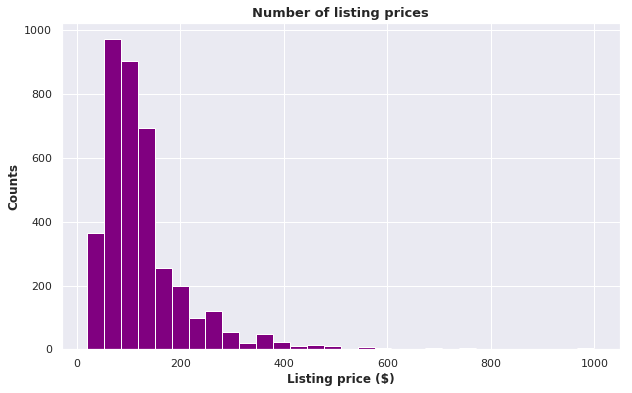

In [60]:
plt.figure(figsize = (10, 6))

plt.hist(df_listings_clean['price'], bins = 30, color = 'purple')
plt.xlabel('Listing price ($)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Counts', fontsize = 12, fontweight = 'bold')
plt.title('Number of listing prices', fontsize = 13, fontweight = 'bold')

# plt.savefig('Listing price distrubution.jpeg')
plt.show()

#### 2.2.2 Pairplot of key numerical features

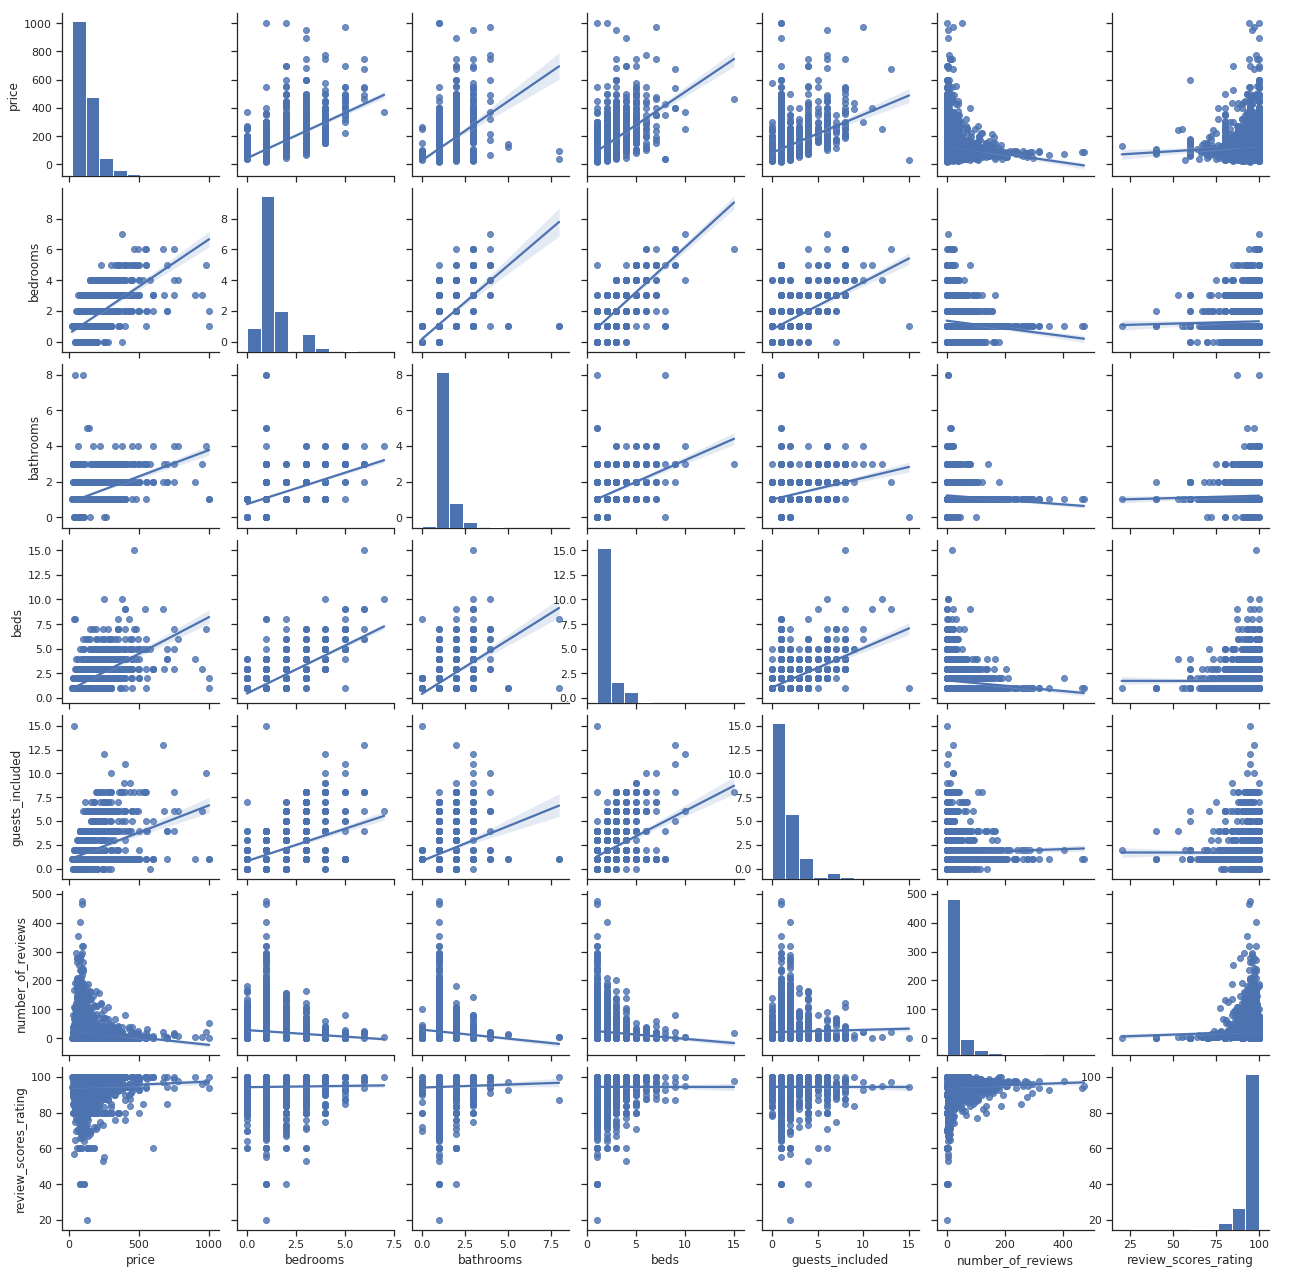

In [61]:
pair_set = ['price','bedrooms','bathrooms','beds','guests_included',
            'number_of_reviews','review_scores_rating']

sns.set(style = "ticks")
sns.pairplot(df_listings_clean[pair_set], kind = 'reg')

plt.savefig('Pairplot of key numerical features')
plt.show()

#### 2.2.3 Correlation between price and selected numerical features

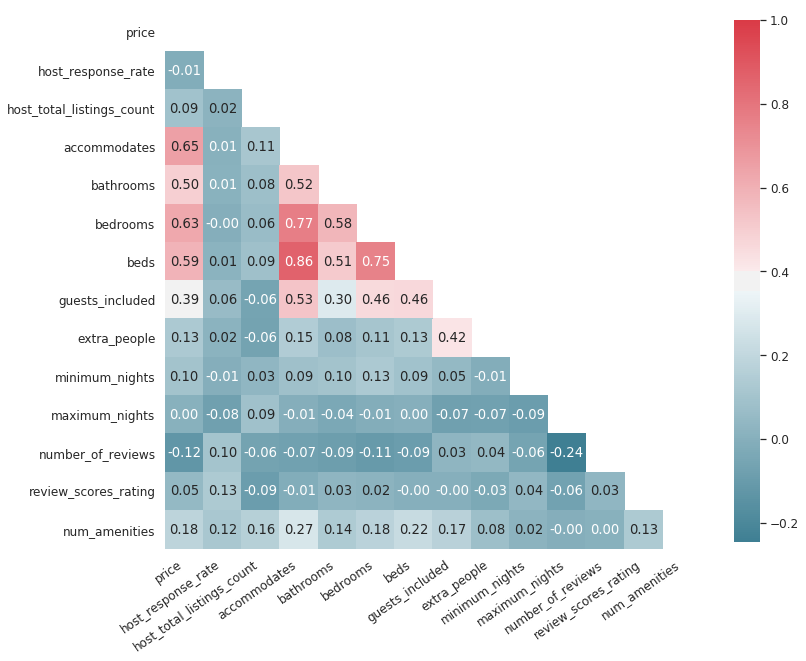

In [62]:
corr_cols = ['price','host_response_rate','host_total_listings_count',
             'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 
             'extra_people', 'minimum_nights', 'maximum_nights',
             'number_of_reviews', 'review_scores_rating', 'num_amenities']

#Find out correlation between columns and plot
corr_matrix = df_listings_clean[corr_cols].corr()

sns.set(font_scale = 1.1, style = "white")
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

fig, ax = plt.subplots(figsize = (12,12))  
corr_hm = sns.heatmap(corr_matrix, cbar = True, cbar_kws={"shrink": .8}, 
                      annot = True, mask = mask, square = True, 
                      cmap = cmap, fmt = '.2f', ax = ax)
corr_hm.set_xticklabels(corr_hm.get_xticklabels(), rotation = 35, 
                        horizontalalignment = 'right')

plt.savefig('correlations.png')
plt.show()

In [63]:
corr_matrix['price'].sort_values(ascending = False)

price                        1.000000
accommodates                 0.652255
bedrooms                     0.627651
beds                         0.589054
bathrooms                    0.496058
guests_included              0.392953
num_amenities                0.184455
extra_people                 0.128029
minimum_nights               0.097126
host_total_listings_count    0.093876
review_scores_rating         0.050449
maximum_nights               0.004796
host_response_rate          -0.012749
number_of_reviews           -0.124724
Name: price, dtype: float64

Based on the pairplot and heatmap, we can primarily conclude that price has a stronger correlation with `accommodates`, `bedrooms`, `beds`, `bathrooms`, `guests_included`, etc., which makes sense since the bigger the house/room, the higher the host will charge for the higher accommodating capacity.

There is also weak correlation between price and features like `num_amenities` and `extra_people`, which is related to accommodating capacity and services provided. 

Features like `minimum_nights`, `host_total_listings_count`, `review_scores_rating`, `maximum_nights` and `host_response_rate` have almost no correlation with listing price, therefore increasing these values do not necesaarily drive the price up much. 

Finally, there's a negative correlation between price and `number_of_reviews`, which means that the higher the listing price, the fewer the reviews - of course, there must be less people that can afford a more expensive house!

#### 2.2.4 Relationship between price and key categorical variables

In [64]:
def price_feature_plot(df, feature, width, height, color, rotation):
    """
    Plot the average listings price by feature of interest
    Input - df: data to be processed
            feature: features of interest
            width: figure width
            height: figure height
            color: color of the plot
            rotation: rotation angle of the xlabel
    Output: price-feature plot
    """
    
    df_average_price_by_feature = df_listings_clean.groupby(feature)['price']\
                                    .mean().sort_values(ascending = False).reset_index()

    plt.figure(figsize = (width, height))

    sns.barplot(x = feature, y = 'price', 
                data = df_average_price_by_feature, color = color,
                order = df_average_price_by_feature[feature])

    plt.xticks(rotation = rotation)

    plt.ylabel('Average listing price ($)', fontsize = 12, fontweight = 'bold')
    plt.xlabel(feature, fontsize = 12, fontweight = 'bold')
    plt.title('Average listing price by ' + feature, fontsize = 13, fontweight = 'bold')

    plt.savefig('Average listing price by ' + feature)

    plt.show()

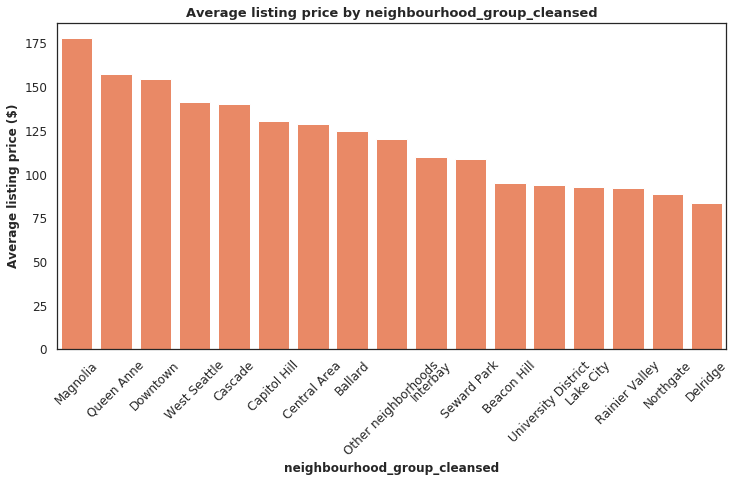

In [65]:
price_feature_plot(df_listings_clean, 'neighbourhood_group_cleansed', 12, 6, 'coral', 45)

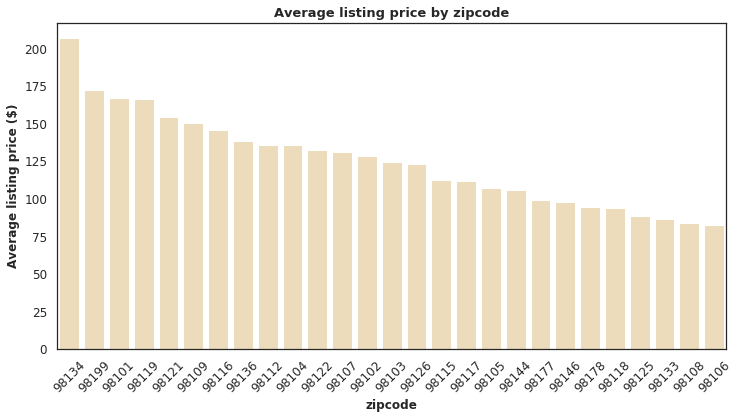

In [66]:
price_feature_plot(df_listings_clean, 'zipcode', 12, 6, 'wheat', 45)

The location definitely matters whether you're listing your house or looking for a cozy place to stay. You may use these two plots as a reference when choosing an Airbnb to stay or estimating a reasonable price for your listings.

Now let's check out some other interesting features.

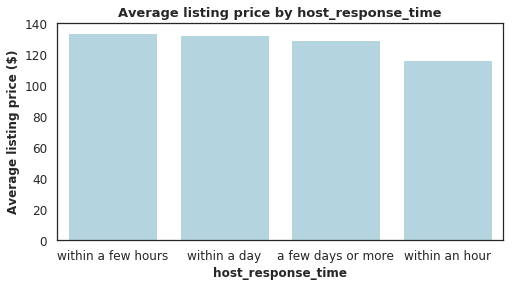

In [67]:
price_feature_plot(df_listings_clean, 'host_response_time', 8, 4, 'lightblue', 0)

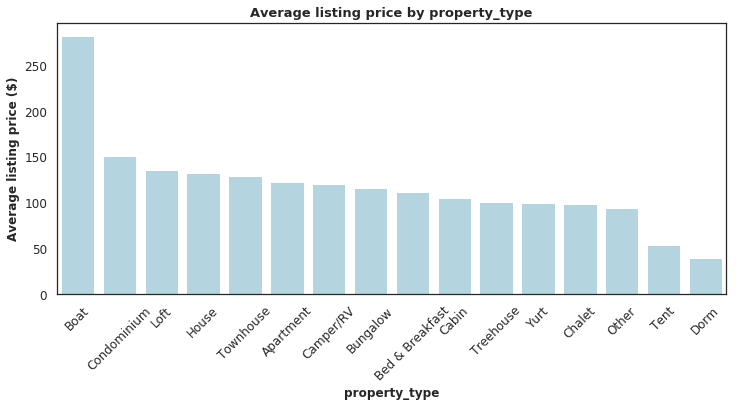

In [68]:
price_feature_plot(df_listings_clean, 'property_type', 12, 5, 'lightblue', 45)

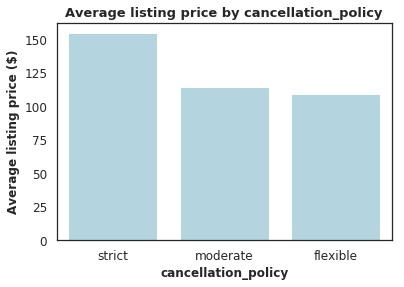

In [69]:
price_feature_plot(df_listings_clean, 'cancellation_policy', 6, 4, 'lightblue', 0)

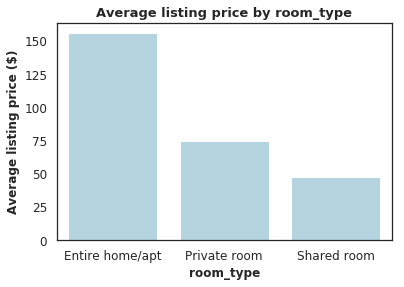

In [70]:
price_feature_plot(df_listings_clean, 'room_type', 6, 4, 'lightblue', 0)

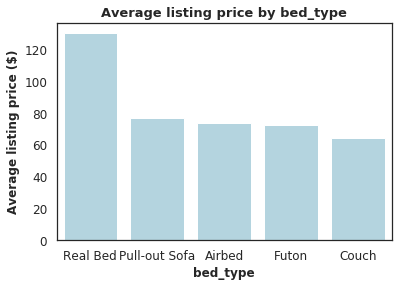

In [71]:
price_feature_plot(df_listings_clean, 'bed_type', 6, 4, 'lightblue', 0)

In [72]:
df_listings_clean['host_is_superhost'].value_counts()

f    3038
t    778 
Name: host_is_superhost, dtype: int64

In [73]:
df_listings_clean.groupby(['host_is_superhost'])['price']\
                 .mean().sort_values(ascending = False)

host_is_superhost
t    130.140103
f    127.423963
Name: price, dtype: float64

In [74]:
df_listings_clean['instant_bookable'].value_counts()

f    3225
t    591 
Name: instant_bookable, dtype: int64

In [75]:
df_listings_clean.groupby(['instant_bookable'])['price']\
                 .mean().sort_values(ascending = False)

instant_bookable
f    129.203411
t    121.289340
Name: price, dtype: float64

From these visuals, we can roughly tell that higher listing price is more associated with boat-type property, strict cancellation policy, entirehome/apartment, and real bed. Host response time doesn't affect listing price much. Host type doesn't affect listing price much either, since the price should be more associated with the type of property and/or services they provide as we discussed earlier. One interesting observation is that instant bookable listings shows slightly less price than non-instant bookable ones. This is probably due to lower popularity (therefore better availability for booking) of these listings that drives the price lower.

### 2.3 Listing price prediction

#### 2.3.1 Create dummy values for categorical variables

In [76]:
# Change boolean values to binary
for col in ['host_is_superhost', 'instant_bookable']:
    df_listings_clean[col].replace('t', 1, inplace = True)
    df_listings_clean[col].replace('f', 0, inplace = True)

In [77]:
# Create dummy variables for selected categorical variables

def create_dummy(df, cat_cols, dummy_na):
    """
    Create dummy variables for categorical values
    Input - df: data to be processed
            cat_cols: categorical variables to be transformed
            dummy_na: Add a column to indicate NaNs (ignored if False)
    Output - a new dataframe with dummy variables of categorical values
    """
    
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis = 1), \
                            pd.get_dummies(df[col], prefix = col, \
                            prefix_sep = '_', drop_first = True, \
                            dummy_na = dummy_na)], axis = 1)
        except:
            continue
            
    return df

In [78]:
# Choose categorical variable to be transformed
cat_cols = ['host_response_time','neighbourhood_group_cleansed','zipcode',\
            'property_type','room_type','bed_type','cancellation_policy', \
            'host_is_superhost','instant_bookable']

df_listings_new = create_dummy(df_listings_clean, cat_cols, dummy_na = False)

In [79]:
# Check results
pd.set_option('display.max_columns', None)
df_listings_clean.select_dtypes('object').head()

df_listings_new.head()

,id,host_id,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,num_amenities,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost_1,instant_bookable_1
0,241032,956883,96.000000,3,4,1,1,1,85.0,2,5.0,1,365,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,953595,5177328,98.000000,6,4,1,1,1,150.0,1,0.0,2,90,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,3308979,16708587,67.000000,2,11,4,5,7,975.0,10,25.0,4,30,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,7421966,9851441,94.886798,1,3,1,0,2,100.0,1,0.0,1,1125,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,278830,1452570,100.000000,2,6,2,3,3,450.0,6,15.0,1,1125,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [80]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 92 columns):
id                                                  3816 non-null object
host_id                                             3816 non-null object
host_response_rate                                  3816 non-null float64
host_total_listings_count                           3816 non-null int64
accommodates                                        3816 non-null int64
bathrooms                                           3816 non-null int64
bedrooms                                            3816 non-null int64
beds                                                3816 non-null int64
price                                               3816 non-null float64
guests_included                                     3816 non-null int64
extra_people                                        3816 non-null float64
minimum_nights                                      3816 non-null int64
maximum_nights       

#### 2.3.2 Get training and test data

In [81]:
X = df_listings_new.drop(['price','id','host_id'], axis = 1)
y = df_listings_new['price']

X_train, X_test, y_train, y_test = train_test_split( # shuffle: default = True
                                    X, y, test_size = 0.2, random_state = 42)

In [82]:
# Train a Random Forest Regressor model and print results
rf_model = RandomForestRegressor(n_estimators = 300, 
                                 criterion = 'mse', 
                                 random_state = 42, 
                                 n_jobs = -1)

rf_model.fit(X_train, y_train.squeeze())

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print('Training data: {}, test data: {}'.format(len(X_train), len(X_test)))
print('Random Forest MSE results - train: {:4f}, test: {:.4f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('Random Forest R^2 results - train: {:.4f}, test: {:.4f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
        

Training data: 3052, test data: 764
Random Forest MSE results - train: 490.559800, test: 2989.9224
Random Forest R^2 results - train: 0.9413, test: 0.5911


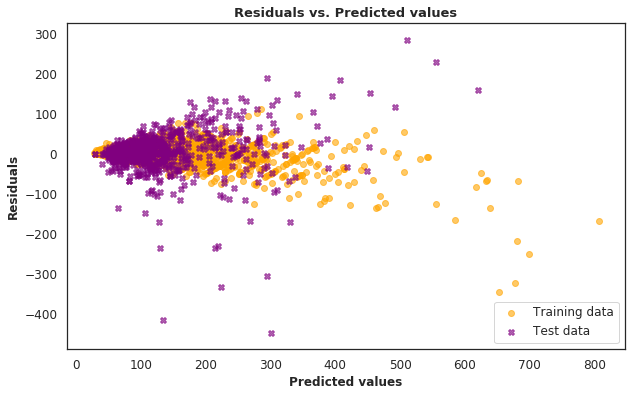

In [83]:
# plot the residuals

plt.figure(figsize = (10,6))
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'orange', 
            marker = 'o', alpha = 0.6, label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'purple', 
            marker = 'X', alpha = 0.6, label = 'Test data')

plt.xlabel('Predicted values', fontsize = 12, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 12, fontweight = 'bold')
plt.title('Residuals vs. Predicted values', fontsize = 13, fontweight = 'bold')
plt.legend(loc = 'lower right')

plt.savefig('residuals - predictedvalues.png')
plt.show()

#### 2.3.3 Visualizing features of importance to listing price

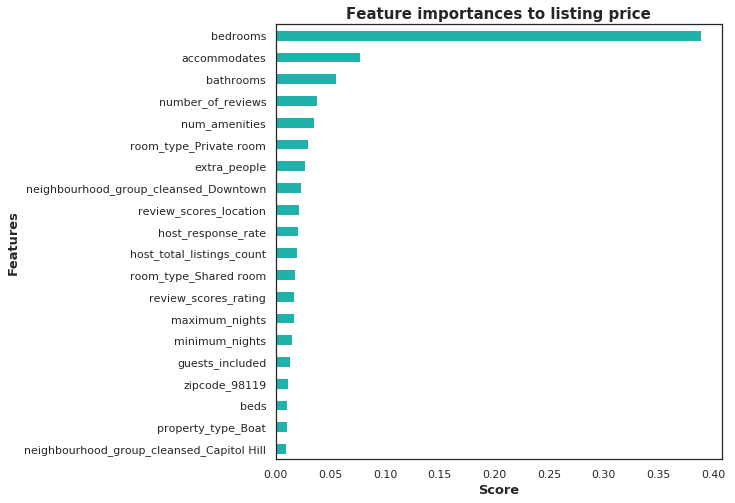

In [84]:
feature_importance = pd.Series(rf_model.feature_importances_,
                               #index = df_listings_new.columns.drop('price'))
                               index = df_listings_new.columns\
                               .drop(['price','id','host_id']))

feature_importance.nlargest(20).plot(kind = 'barh', 
                                     figsize = (8, 8), 
                                     color = 'lightseagreen')

plt.xlabel('Score', fontsize = 13, fontweight = 'bold')
plt.ylabel('Features', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title("Feature importances to listing price", fontsize = 15, fontweight = 'bold')
plt.gca().invert_yaxis() # display the results in descending order
plt.savefig('feature importantce.png')
plt.show()

## Part 3. What the visitors care most about their stays?
### Please continue with `"Seattle Airbnb Data Analysis - Part3"` notebook.

## References
1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
3. https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-colum
4. https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data
5. https://markhneedham.com/blog/2018/09/18/matplotlib-remove-axis-legend/
6. https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
7. https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
8. https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts
9. https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
10. https://seaborn.pydata.org/examples/many_pairwise_correlations.html
11. https://stackoverflow.com/questions/40849562/change-the-height-of-a-seaborn-heatmap-colorbar
12. https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
13. https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe/49189503
14. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
15. https://matplotlib.org/3.1.1/api/markers_api.html
16. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
17. https://stackoverflow.com/questions/29511645/pandas-plot-x-or-index-column-in-descending-order
18. https://github.com/mwaskom/seaborn/issues/1907